# Naive Bayes dengan Data Kontinu

Pada percobaan ketiga ini, kita akan menggunakan data riil untuk melakukan klasifikasi dengan Naive Bayes. Data yang digunakan adalah **Social_Network_Ads**. Data tersebut menggambarkan usia seseorang dengan pendapatkan yang akan menentukan apakah orang tersebut akan membeli sebuah barang atau tidak. Gaji merupakan data kontinu.

## Tahap Persiapan
Pada tahap ini kita akan melakukan beberapa hal,

1. Load data ke dalam data frame
2. Memisahkan fitur dan label
3. Split data untuk training dan testing

In [5]:
import numpy as np
import pandas as pd

# Load data CSV
df = pd.read_csv('Social_Network_Ads.csv')

# Cek data
display(df.head())

# Memisahkan fitur dengan label
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X)
print(y)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


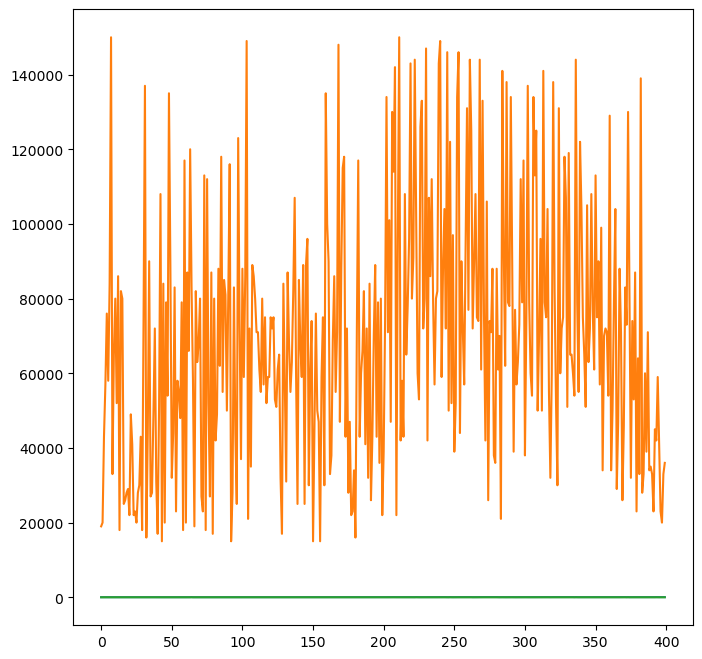

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.plot(df)

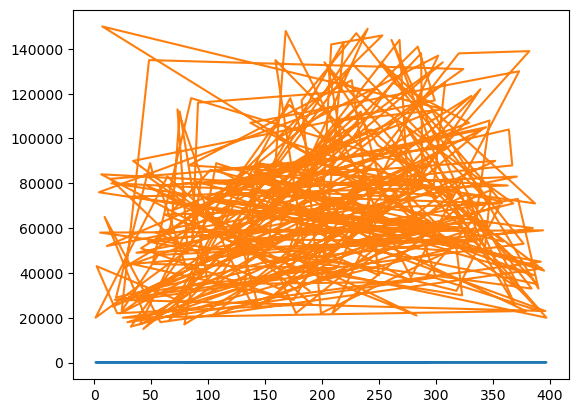

In [22]:
# Split data training dan testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

plt.plot(X_train)

## Training dan Evaluasi Model

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Inisiasi obyek MultinomialNB
gnb = GaussianNB()

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.8964285714285715
Hasil akurasi data test: 0.8833333333333333


## Apakah kita telah melakukan hal yang benar?

Perhatikan kembali fitur dari data. Terdapat **Age** dan **Salary**. Selain keduanya merupakan data kontinu, _Age_ dan _Salary_ memiliki skala yang berbeda. Hal ini "mungkin" dapat menyebabkan kurang akuratnya model dalam memprediksi sebuah kelas. Apakah ini benar?

## Pembuktian

Kita akan melakukan percobaan lanjutan dengan menggunakan standarisasi untuk menjawab pertanyaan, apakah kita perlu melakukan hal tersebut pada model Naive Bayes khususnya tipe Gaussian.

Text(0.5, 1.0, 'Skala diperkecil')

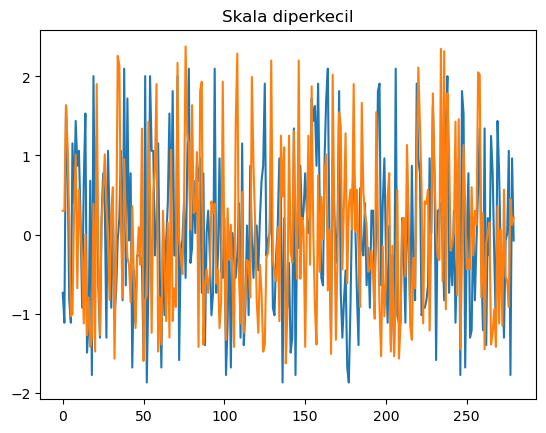

In [19]:
from sklearn.preprocessing import StandardScaler

# Inisasi obyek StandardScaler
scaler = StandardScaler()

# Standarisasi pada fitur di X_train dan X_test
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

plt.plot(X_train_std)
plt.title('Skala diperkecil')

***Pertanyaan***

Mengapa pada X_test kita tidak perlu melakukan proses fitting?

***Jawaban***

Proses fitting (fit) akan menyimpan perhitungan berdasarkan data yang dilatih. Pada kasus standarisasi ini, nilai yang disimpan adalah *mean* dan *standar deviasi* dari data **X_train**. Jika kita melakukan proses fitting kembali pada **X_test** maka nilai mean dan standar deviasi akan berdasarkan data X_test. Kita tidak ingin itu terjadi, karena model diharapkan mampu melakukan klasifikasi dengan baik pada data yang tidak diketahui (data test). Oleh karena itu, pada X_test hanya dilakukan proses **transform** agar pada saat pembuatan model, model akan menggunakan nilai mean dan standar deviasi yang sama dengan data training.

In [23]:
# Buat obyek GaussianNB lain
gnb_std = GaussianNB()

# Fit dengan data yang telah di standarisasi
gnb_std.fit(X_train_std, y_train)

# Prediksi dengan data training
y_train_std_pred = gnb_std.predict(X_train_std)

# Evaluasi akurasi training data
acc_train_std = accuracy_score(y_train, y_train_std_pred)

# Prediksi test data yang telah di standarisasi
y_test_std_pred = gnb_std.predict(X_test_std)

# Evaluasi akurasi testing data
acc_test_std = accuracy_score(y_test, y_test_std_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data training terstandarisasi: {acc_train_std}')
print(f'Hasil akurasi data testing terstandarisasi: {acc_test_std}')

Hasil akurasi data training terstandarisasi: 0.9
Hasil akurasi data testing terstandarisasi: 0.8833333333333333


## Kesimpulan

Jika diperhatikan, tidak terjadi perubahan yang signifikan antara model dari nilai asli dengan model dengan nilai yang telah di standarisasi, terlebih pada hasil dengan menggunakan data test. Hal ini dikarenakan, Naive Bayes bukan jenis algoritma klasifikasi yang mengandalkan jarak, namun probabilitas. Mean dan standar deviasi mungkin berubah, namun probabilitas akan menghasilkan nilai yang sama